In [36]:
from langgraph.graph import StateGraph,END
from dotenv import load_dotenv
load_dotenv()
import os
GROQ_API_KEY=os.getenv("GROQ_API_KEY")
LANGSMITH_API_KEY=os.getenv("LANGSMITH_API_KEY")


In [37]:
from langchain_groq import ChatGroq
llm=ChatGroq(groq_api_key=GROQ_API_KEY,model_name="Gemma2-9b-It")
llm


ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000002166D787AA0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000002166D61DFA0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [38]:
from typing import TypedDict,Annotated
from langgraph.graph import StateGraph,END,START
from langgraph.graph.message import add_messages


In [39]:
class State(TypedDict):
    messages:Annotated[list,add_messages]
graph=StateGraph(State)
graph



In [43]:
def chatbot(state:State):
    return {"messages":llm.invoke(state['messages'])}

graph.add_node("chatbot",chatbot)
graph.add_edge(START,"chatbot")
graph.add_edge("chatbot",END)



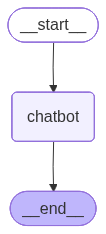

In [46]:
graph_builder=graph.compile()
from IPython.display import Image, display
try:
  display(Image(graph_builder.get_graph().draw_mermaid_png()))
except Exception:
  pass


In [48]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph_builder.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

dict_values([{'messages': AIMessage(content='Hi there! 👋  How can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 10, 'total_tokens': 26, 'completion_time': 0.029090909, 'prompt_time': 0.00116968, 'queue_time': 0.24885754, 'total_time': 0.030260589}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--efa0dc13-cedd-4e3c-a0b6-338f54e1e17e-0', usage_metadata={'input_tokens': 10, 'output_tokens': 16, 'total_tokens': 26})}])
content='Hi there! 👋  How can I help you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 10, 'total_tokens': 26, 'completion_time': 0.029090909, 'prompt_time': 0.00116968, 'queue_time': 0.24885754, 'total_time': 0.030260589}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason'